In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [3]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [4]:
!kaggle datasets download -d nowke9/ipldata

  0% 0.00/1.20M [00:00<?, ?B/s]
100% 1.20M/1.20M [00:00<00:00, 40.4MB/s]


In [5]:
!ls

deliveries.csv	ipldata.zip  kaggle.json  matches.csv


In [6]:
!unzip \*.zip  && rm *.zip

Archive:  ipldata.zip
replace deliveries.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace matches.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

In [8]:
data=pd.read_csv('deliveries.csv')
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
data2= pd.read_csv('matches.csv')
data2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [10]:
data_f = data2.loc[data2.team1.isin(['Kings XI Punjab','Sunrisers Hyderabad'])] 
data_f = data_f.loc[data_f.team2.isin(['Kings XI Punjab','Sunrisers Hyderabad'])] 
data_f

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
18,19,2017,Hyderabad,2017-04-17,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,5,0,B Kumar,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,A Deshmukh,NaN
31,32,2017,Chandigarh,2017-04-28,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,26,0,Rashid Khan,"Punjab Cricket Association IS Bindra Stadium, ...",Nitin Menon,CK Nandan,NaN
404,405,2013,Hyderabad,2013-04-19,Kings XI Punjab,Sunrisers Hyderabad,Kings XI Punjab,bat,normal,0,Sunrisers Hyderabad,0,5,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",HDPK Dharmasena,CK Nandan,NaN
439,440,2013,Chandigarh,2013-05-11,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,30,0,PA Patel,"Punjab Cricket Association Stadium, Mohali",S Das,RJ Tucker,NaN
465,466,2014,Sharjah,2014-04-22,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kings XI Punjab,72,0,GJ Maxwell,Sharjah Cricket Stadium,M Erasmus,S Ravi,NaN
495,496,2014,Hyderabad,2014-05-14,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,WP Saha,"Rajiv Gandhi International Stadium, Uppal",VA Kulkarni,PG Pathak,NaN
543,544,2015,Chandigarh,2015-04-27,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,20,0,TA Boult,"Punjab Cricket Association Stadium, Mohali",HDPK Dharmasena,CB Gaffaney,NaN
563,564,2015,Hyderabad,2015-05-11,Sunrisers Hyderabad,Kings XI Punjab,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,5,0,DA Warner,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,HDPK Dharmasena,NaN
593,594,2016,Hyderabad,2016-04-23,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,5,Mustafizur Rahman,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,CK Nandan,NaN
621,622,2016,Chandigarh,2016-05-15,Kings XI Punjab,Sunrisers Hyderabad,Kings XI Punjab,bat,normal,0,Sunrisers Hyderabad,0,7,HM Amla,"Punjab Cricket Association IS Bindra Stadium, ...",KN Ananthapadmanabhan,M Erasmus,NaN


Finally , We have got a complete dataset for all the matches of KXIP VS SRH

**Let's do Q1 now**

KXIP Wins - 4
SRH Wins - 10


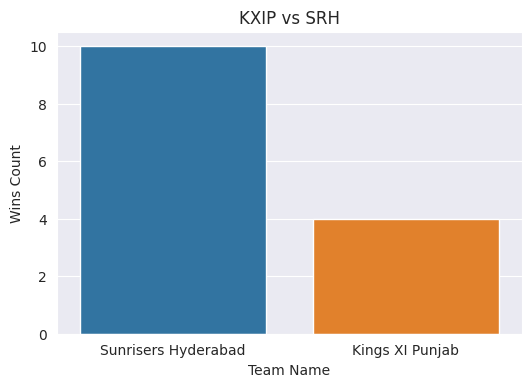

In [12]:
plt.figure(dpi=100)
sns.countplot(x='winner',data = data_f)
plt.ylabel('Wins Count')
plt.xlabel('Team Name')
plt.title('KXIP vs SRH')
A,B =data_f.winner.value_counts()

print('KXIP Wins -',B)
print('SRH Wins -',A)

plt.show()


In [14]:
data_f = data_f.loc[data_f.city.isin(['Sharjah','Dubai','Abu Dhabi'])] 
data_f

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
465,466,2014,Sharjah,2014-04-22,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kings XI Punjab,72,0,GJ Maxwell,Sharjah Cricket Stadium,M Erasmus,S Ravi,NaN


Well Overall Punjab has an advantage but in only match played in UAE KXIP has advantage .

Also, by analysing above dataset in last 3 matches Punjab has won 2 compared to 1 by SRH.

Therefore,marked KXIP.

**Let's do Q2 now**

**Warner not out counts and strike rate**

In [15]:
data_n = data.loc[data.bowling_team.isin(['Kings XI Punjab'])]
data_n = data_n.loc[data.batsman.isin(['DA Warner'])]
data_n

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
4312,19,1,Sunrisers Hyderabad,Kings XI Punjab,1,1,DA Warner,S Dhawan,Sandeep Sharma,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4313,19,1,Sunrisers Hyderabad,Kings XI Punjab,1,2,DA Warner,S Dhawan,Sandeep Sharma,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4314,19,1,Sunrisers Hyderabad,Kings XI Punjab,1,3,DA Warner,S Dhawan,Sandeep Sharma,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4315,19,1,Sunrisers Hyderabad,Kings XI Punjab,1,4,DA Warner,S Dhawan,Sandeep Sharma,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
4317,19,1,Sunrisers Hyderabad,Kings XI Punjab,1,6,DA Warner,S Dhawan,Sandeep Sharma,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176247,11339,1,Sunrisers Hyderabad,Kings XI Punjab,15,3,DA Warner,MK Pandey,A Singh,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
176250,11339,1,Sunrisers Hyderabad,Kings XI Punjab,15,6,DA Warner,MK Pandey,A Singh,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
176251,11339,1,Sunrisers Hyderabad,Kings XI Punjab,16,1,DA Warner,MK Pandey,R Ashwin,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
176252,11339,1,Sunrisers Hyderabad,Kings XI Punjab,16,2,DA Warner,MK Pandey,R Ashwin,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN


In [16]:
data_n.match_id.nunique() # Matches of Warner v KXIP

17

In [20]:
data_n.player_dismissed.value_counts().sum() # Dismissal v KXIP

17

In [21]:
data_n.total_runs.sum() # Warner Runs v KXIP

876

In [24]:
data_n.over.value_counts().sum() # Balls faced v KXIP

595

In [26]:
np.round(876/595*100,2)

147.23

Let's mark out ans 125+

**For Q3, Let's find Rahul's contribution**



In [37]:
data_m = data.loc[data.bowling_team.isin(['Sunrisers Hyderabad'])]
data_m = data_m.loc[data.batting_team.isin(['Kings XI Punjab'])]
data_m = data_m.loc[data.batsman.isin(['KL Rahul'])]
data_m.match_id.unique()

array([ 7909,  7918, 11313, 11339])

Matches played by Rahul v SRH

Let's find contribution now

In [35]:
data_m.batsman_runs.sum() # Runs scored by KL Rahul 

205

In [39]:
data_m2 = data.loc[data.bowling_team.isin(['Sunrisers Hyderabad'])]
data_m2 = data_m2.loc[data.batting_team.isin(['Kings XI Punjab'])]
data_m2 = data_m2.loc[data.match_id.isin(['7909','7918','11313','11339'])]

In [40]:
data_m2.total_runs.sum() # Runs scored by KXIP when KL Rahul has played

648

In [41]:
np.round(205/648*100,2)

31.64

It has been high contribution by KL Rahul v SRH.

Let's mark 23% or more considering our analysis

**Let's do Q4**

**Let's find Balls faced by SRH to achieve 50 runs**

In [61]:
data_s = data.loc[data.bowling_team.isin(['Kings XI Punjab'])]
data_s = data_s.loc[data.batting_team.isin(['Sunrisers Hyderabad'])]

In [47]:
data_s = data_s.loc[(data_s.over<=5)] # Runs in less than 5 overs

In [48]:
data_s.total_runs.sum() # total runs

590

In [54]:
data_s.match_id.nunique() 

14

In [66]:
np.round(590/14,2) # Average score in firsr 30 balls

42.14

Let's find average score in first 6 overs

In [62]:
data_s2 = data_s.loc[(data_s.over<=6)]

In [63]:
data_s2.total_runs.sum() # Runs in 6 overs

696

In [67]:
np.round(696/14,2) # Average runs in first 6 overs by SRH v KXIP

49.71

Still they got short of 50 runs

Let's mark 37-42 considering our analysis

**Let's do Q5 now**

**Let's find Gayle average score in first 10 balls**

In [70]:
data_c = data.loc[data.bowling_team.isin(['Sunrisers Hyderabad'])]
data_c = data_c.loc[data.batsman.isin(['CH Gayle'])]

In [84]:
data_cg = data_c.loc[(data_c.over<=2) & (data_c.ball<=4)]

In [85]:
data_cg.batsman_runs.sum() # Average runs scored in first 10 balls

71

In [82]:
data_cg.match_id.nunique() # Total matches

10

In [86]:
np.round(71/10,2)

7.1

Let's mark less than 10 considering our analysis

Thank You again for this amazing internship.

Looking forward to it tomorrow.

Regards,

Ashaab Rizvi

